## Step1. 사진 모으기

In [20]:
import os
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

file_list: ['김고은.jfif', '경리.jpg', '서현진.jpg', '설현.jfif', '박소담.jpg', '이솜.jpg', '박규영.jpg', '설인아.jpg', '전여빈.jpg', '류혜영.jpg', '혜리.jpg', '증명사진.jpg', '진세연.jpg', '김유정.jpg', '고윤정.jpg', '박보영.jpg', '신민아.jpg', '한소희.jpg', '조보아.jpg', '임수향.jpg', '한지민.jfif', '신혜선.jpg', '공승연.jpg', '신세경.jpg', '한효주.jpg']


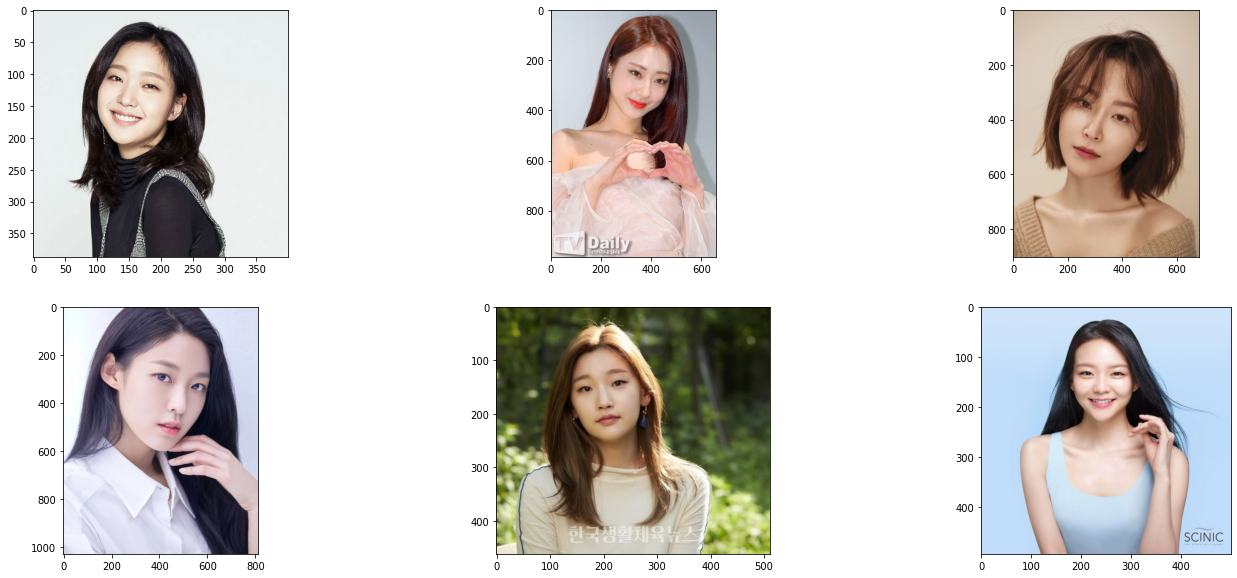

In [21]:
#이미지 로드

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(81, 373, 236, 218)]


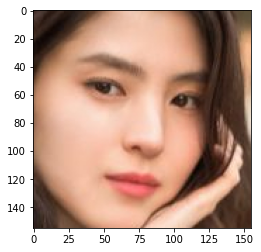

In [22]:
#이미지 크롭 확인

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/한소희.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## Step2. 얼굴 영역 자르기

In [23]:
# 얼굴 영역을 구하는 함수 get_cropped_face

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

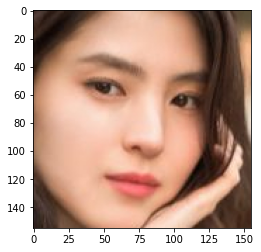

In [24]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/한소희.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

In [25]:
##이미지 확인

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['김고은.jfif', '경리.jpg', '서현진.jpg', '설현.jfif', '박소담.jpg', '이솜.jpg', '박규영.jpg', '설인아.jpg', '전여빈.jpg', '류혜영.jpg', '혜리.jpg', '증명사진.jpg', '진세연.jpg', '김유정.jpg', '고윤정.jpg', '박보영.jpg', '신민아.jpg', '한소희.jpg', '조보아.jpg', '임수향.jpg', '한지민.jfif', '신혜선.jpg', '공승연.jpg', '신세경.jpg', '한효주.jpg']


In [26]:
#얼굴 임베딩 벡터를 구하는 함수 get_face_embedding

image_file = os.path.join(dir_path, '한소희.jpg')
face = get_cropped_face(image_file)   


def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-1.01686373e-01,  7.99589381e-02,  1.36288740e-02, -9.94451270e-02,
        -1.30967140e-01, -3.50912362e-02, -4.47246209e-02, -1.11563154e-01,
         1.35352671e-01, -1.83856308e-01,  2.26620525e-01, -1.38665512e-01,
        -1.96679503e-01,  2.94661932e-02, -8.76209289e-02,  2.16407344e-01,
        -1.66791081e-01, -1.09390512e-01, -5.48729524e-02, -1.84343792e-02,
         1.15813680e-01,  3.44187766e-02, -5.51645570e-02,  8.71805847e-02,
        -1.20377705e-01, -2.93552309e-01, -1.44090459e-01, -5.42680882e-02,
        -2.81972513e-02, -2.50198692e-03, -1.97062586e-02,  4.88135591e-02,
        -1.84629142e-01, -5.59004545e-02,  3.34432349e-02,  8.64824951e-02,
        -2.32483074e-02, -4.74521592e-02,  1.62107542e-01, -4.15269956e-02,
        -2.45289862e-01,  8.15447345e-02,  1.71961144e-01,  2.42359653e-01,
         1.43366545e-01,  2.15449631e-02,  7.07223080e-03, -1.32910669e-01,
         9.69157889e-02, -1.66138306e-01,  3.14072855e-02,  9.76629704e-02,
         1.2

In [27]:
#디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(image_path)
            embedding = get_face_embedding(face)

            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김.
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        except:
            continue
        
    return embedding_dict


In [28]:
#확인

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['김고은']

array([-0.07523395,  0.05976003,  0.07550335, -0.10411822, -0.10303096,
       -0.04054291, -0.05342007, -0.03983246,  0.15886448, -0.15348995,
        0.16978911, -0.10332887, -0.23576048,  0.00162572, -0.03641877,
        0.19344336, -0.1248126 , -0.12767473, -0.02025934,  0.03271669,
        0.10443814,  0.0378459 , -0.06959125,  0.04132973, -0.09665214,
       -0.31290594, -0.10889583, -0.01850879, -0.06586259, -0.09813721,
       -0.04952985,  0.0316621 , -0.20247611, -0.03565748,  0.00349647,
        0.12184343, -0.00705805, -0.13107505,  0.13223104,  0.01780292,
       -0.29680353,  0.05731691,  0.05186057,  0.21861281,  0.12517045,
        0.0204496 , -0.01763969, -0.13012138,  0.10992776, -0.16026665,
        0.01488737,  0.12383287,  0.06870107,  0.04984314, -0.01050268,
       -0.10855509,  0.07806789,  0.10389681, -0.18027744, -0.01442851,
        0.14068751, -0.06531704,  0.01318122, -0.09387066,  0.20892417,
        0.06487482, -0.12313867, -0.17068039,  0.1147652 , -0.16

## Step4. 모은 연예인들과 비교하기

In [29]:
#get_distance() 함수는 인자로 파일명의 사람 이름 2개를 받아서, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 형태입니다.

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('한소희', '김고은')

0.46889628157678676

In [30]:
#name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 한다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('한소희')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('jennie') 라고 호출할 때 kimyojung와 jennie 사이의 임베딩 벡터 거리를 계산합니다.
sort_key_func('김고은')

0.46889628157678676

In [31]:
nearst_list = {}

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            nearst_list[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])
            print("rank : {}, 이름: {}, 거리: {}".format(i, sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))

In [32]:
#가장 닮은 사람 Top5
get_nearest_face('증명사진')

rank : 1, 이름: 경리, 거리: 0.3915645057612417
rank : 2, 이름: 류혜영, 거리: 0.42674685144566865
rank : 3, 이름: 고윤정, 거리: 0.43331668216954955
rank : 4, 이름: 서현진, 거리: 0.43433498714242325
rank : 5, 이름: 이솜, 거리: 0.444294110286283
